Proof of concept convolutional neural network trained to predict the nonlinear subthreshold membrane voltage dynamics of a biological neuron modeled using the Hodkin and Huxley (J Physiol. 1952 Aug 28; 117(4): 500–544.
doi: https://doi.org/10.1113/jphysiol.1952.sp004764) formalism, to noisy (synaptic) input currents. 

To generate training/validation data file(s), run the notebook HodkinHuxleyDataGeneration.ipynb first

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.regularizers import l2
from keras.utils.io_utils import HDF5Matrix

Using TensorFlow backend.


In [3]:
np.random.seed(1234)

In [4]:
# load data
X = HDF5Matrix('HH_data.h5', 'X')
Y = HDF5Matrix('HH_data.h5', 'Y')

X_test = HDF5Matrix('HH_data.h5', 'X_val')
Y_test = HDF5Matrix('HH_data.h5', 'Y_val')

/Users/ehagen/anaconda3/envs/ml/lib/python3.6/site-packages/keras/utils/io_utils.py:60: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(datapath)


In [5]:
X.shape, Y.shape

((10000, 1000, 1), (10000, 1000, 1))

In [6]:
def generate_model(input_shape, lr=0.001, layer_sizes=[2, 6, 16], 
                  kernel_sizes=[11, 5, 1]):
    keras.backend.clear_session()

    # Define model
    model = keras.models.Sequential()
    
    # input layer
    model.add(keras.layers.InputLayer(input_shape))

    # convolutional layers and activation
    for ls, ks in zip(layer_sizes, kernel_sizes):
        model.add(keras.layers.Conv1D(ls, 
                                      kernel_size=ks, 
                                      padding='same',
                                      kernel_regularizer=l2(),
                                      bias_regularizer=l2(),
                                      activation='relu'))

    # dense output layer
    model.add(keras.layers.TimeDistributed(
        keras.layers.Dense(1, activation='linear')))

    # optimizer
    opt = keras.optimizers.Adam(lr=lr)

    # compile model
    model.compile(loss='mse', optimizer=opt, metrics=['mse'])

    return model

In [7]:
model = generate_model(input_shape=(None, 1))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 2)           24        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 6)           66        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          112       
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1)           17        
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


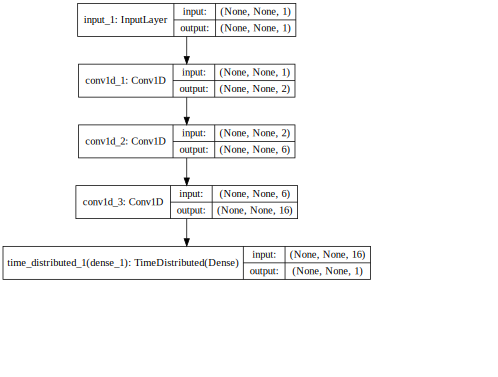

In [9]:
import pydot
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot

#plot_model(model, to_file='model.png')
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
history = model.fit(X, Y, batch_size=100, epochs=100, validation_split=0.05)

Train on 9500 samples, validate on 500 samples
Epoch 1/100
9500/9500 [==============================] - 10s 1ms/step - loss: 2401.5055 - mse: 2401.3796 - val_loss: 1434.1180 - val_mse: 1433.9877
Epoch 2/100
9500/9500 [==============================] - 10s 1ms/step - loss: 1356.2302 - mse: 1356.0952 - val_loss: 1252.4518 - val_mse: 1252.3092
Epoch 3/100
9500/9500 [==============================] - 10s 1ms/step - loss: 1147.3892 - mse: 1147.2357 - val_loss: 1019.9440 - val_mse: 1019.7762
Epoch 4/100
9500/9500 [==============================] - 8s 878us/step - loss: 902.6329 - mse: 902.4470 - val_loss: 788.1309 - val_mse: 787.9260
Epoch 5/100
9500/9500 [==============================] - 9s 927us/step - loss: 714.0163 - mse: 713.7946 - val_loss: 649.2391 - val_mse: 649.0024
Epoch 6/100
9500/9500 [==============================] - 8s 883us/step - loss: 608.9116 - mse: 608.6627 - val_loss: 569.1240 - val_mse: 568.8636
Epoch 7/100
9500/9500 [==============================] - 9s 928us/step - l

9500/9500 [==============================] - 8s 867us/step - loss: 0.9977 - mse: 0.2465 - val_loss: 1.0031 - val_mse: 0.2528
Epoch 60/100
9500/9500 [==============================] - 8s 831us/step - loss: 0.9972 - mse: 0.2478 - val_loss: 1.0093 - val_mse: 0.2607
Epoch 61/100
9500/9500 [==============================] - 8s 888us/step - loss: 1.0068 - mse: 0.2592 - val_loss: 1.0450 - val_mse: 0.2983
Epoch 62/100
9500/9500 [==============================] - 8s 826us/step - loss: 1.0032 - mse: 0.2575 - val_loss: 1.0122 - val_mse: 0.2674
Epoch 63/100
9500/9500 [==============================] - 10s 1ms/step - loss: 0.9974 - mse: 0.2536 - val_loss: 0.9881 - val_mse: 0.2453
Epoch 64/100
9500/9500 [==============================] - 15s 2ms/step - loss: 0.9863 - mse: 0.2444 - val_loss: 0.9982 - val_mse: 0.2573
Epoch 65/100
9500/9500 [==============================] - 14s 1ms/step - loss: 0.9808 - mse: 0.2410 - val_loss: 0.9782 - val_mse: 0.2395
Epoch 66/100
9500/9500 [==========================

Text(0.5, 1.0, 'training/validation loss')

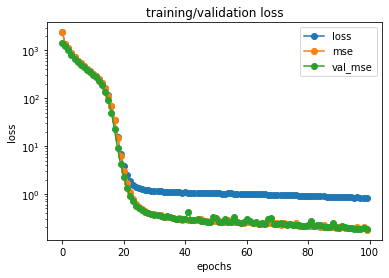

In [12]:
plt.figure()
plt.semilogy(history.history['loss'], '-o', label='loss')
plt.semilogy(history.history['mse'], '-o', label='mse')
plt.semilogy(history.history['val_mse'], '-o', label='val_mse')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training/validation loss')

Text(0.5, 0, '$t$ (ms)')

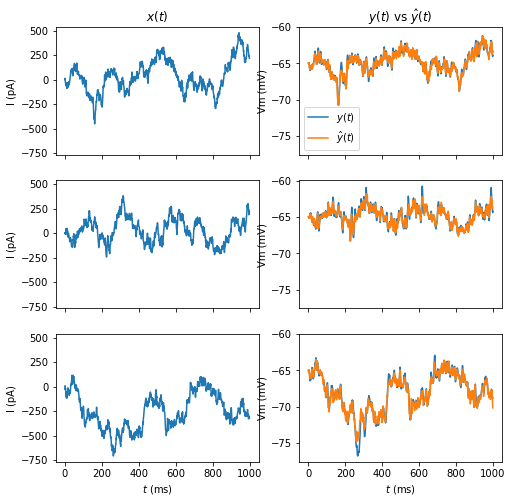

In [13]:
# visualize predictions on some samples from the training/validation set
n_val_samples = 3
X_val = history.validation_data[0][:n_val_samples]
Y_val = history.validation_data[1][:n_val_samples]

Y_pred = model.predict(X_val)

# compare prediction to ground truth
fig, axes = plt.subplots(n_val_samples, 2, figsize=(8, 8), 
                         sharex=True, sharey='col')
for i in range(n_val_samples):
    axes[i, 0].plot(X_val[i], label='$x(t)$')
    axes[i, 1].plot(Y_val[i], label='$y(t)$')
    axes[i, 1].plot(Y_pred[i], label='$\hat{y}(t)$')
    if i == 0:
        axes[i, 1].legend()
        axes[i, 0].set_title('$x(t)$')
        axes[i, 1].set_title('$y(t)$ vs $\hat{y}(t)$')
    axes[i, 0].set_ylabel('I (pA)')
    axes[i, 1].set_ylabel('Vm (mV)')
axes[i, 0].set_xlabel('$t$ (ms)')
axes[i, 1].set_xlabel('$t$ (ms)')

Text(0.5, 0, '$t$ (ms)')

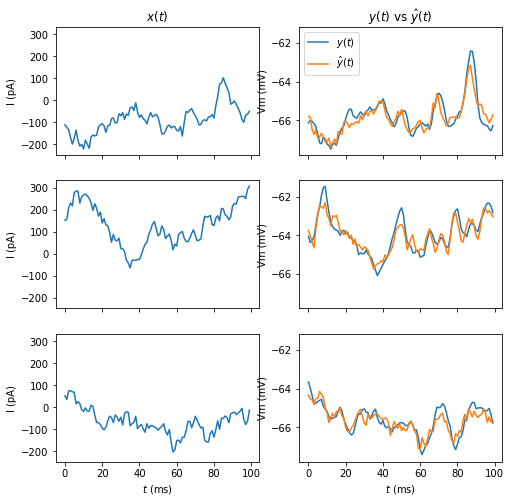

In [14]:
# test with time series longer than training set time series
Y_pred = model.predict(X_test)

# compare prediction to ground truth
fig, axes = plt.subplots(n_val_samples, 2, figsize=(8, 8), 
                         sharex=True, sharey='col')
for i in range(n_val_samples):
    axes[i, 0].plot(X_test[i][2900:3000], label='$x(t)$')
    axes[i, 1].plot(Y_test[i][2900:3000], label='$y(t)$')
    axes[i, 1].plot(Y_pred[i][2900:3000], label='$\hat{y}(t)$')
    if i == 0:
        axes[i, 1].legend()
        axes[i, 0].set_title('$x(t)$')
        axes[i, 1].set_title('$y(t)$ vs $\hat{y}(t)$')
    axes[i, 0].set_ylabel('I (pA)')
    axes[i, 1].set_ylabel('Vm (mV)')
axes[i, 0].set_xlabel('$t$ (ms)')
axes[i, 1].set_xlabel('$t$ (ms)')